In [1]:
# 整理資料用pandas
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["ans"] = boston["target"]
# df.to_csv("boston.csv", encoding="utf-8", index=False)

C:\Users\HTLin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [2]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城鎮非零售業商用土地比例

CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近

NOX：一氧化氮濃度（千萬分之一）

RM：住宅的平均房間數

AGE：自住且建於1940年前的房屋比例

DIS：到5個波士頓就業中心的加權距離

RAD：到高速公路的便捷度指數

TAX：每萬元的房產稅率

PTRATIO：城鎮學生教師比例

B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例

LSTAT：低收入人群比例

ans：自住房中位數價格，單位是千元

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 看一下資料的相關性
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

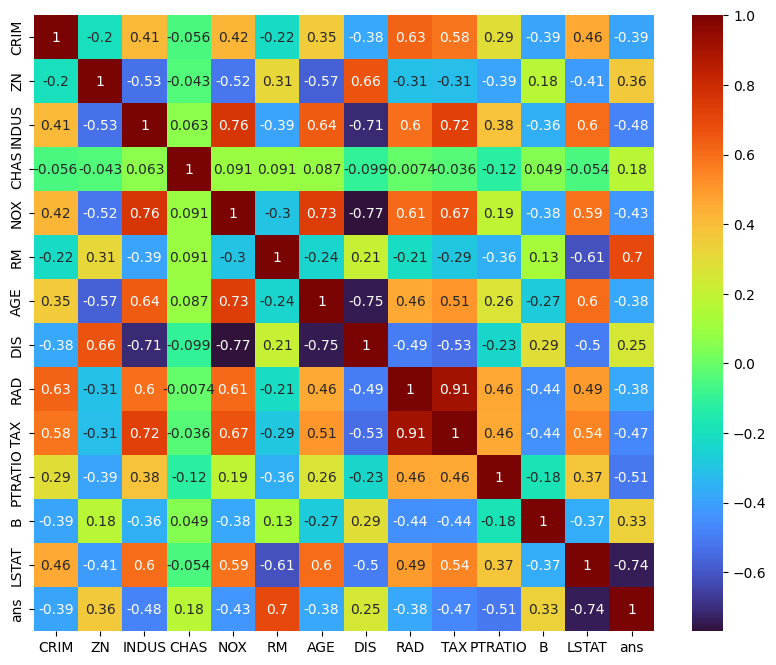

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df.astype("float").corr(), cmap="turbo", annot=True)

In [6]:
# 進到機器學習使用numpy
import numpy as np
x = np.array(df.drop(["ans"], axis=1))
y = np.array(df["ans"])

In [7]:
# 把資料切成 訓練資料/測試資料
from sklearn.model_selection import train_test_split
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [8]:
# 把訓練資料丟給演算法學習(fit)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

[Text(0.5534420289855072, 0.9285714285714286, 'RM <= 6.941\nsquared_error = 82.128\nsamples = 455\nvalue = 22.35'),
 Text(0.26992753623188404, 0.7857142857142857, 'LSTAT <= 14.395\nsquared_error = 40.647\nsamples = 392\nvalue = 19.922'),
 Text(0.07971014492753623, 0.6428571428571429, 'DIS <= 1.434\nsquared_error = 26.864\nsamples = 229\nvalue = 23.424'),
 Text(0.028985507246376812, 0.5, 'B <= 339.985\nsquared_error = 78.146\nsamples = 5\nvalue = 45.58'),
 Text(0.014492753623188406, 0.35714285714285715, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.043478260869565216, 0.35714285714285715, 'squared_error = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(0.13043478260869565, 0.5, 'RM <= 6.543\nsquared_error = 14.517\nsamples = 224\nvalue = 22.929'),
 Text(0.07246376811594203, 0.35714285714285715, 'LSTAT <= 7.62\nsquared_error = 8.203\nsamples = 176\nvalue = 21.687'),
 Text(0.043478260869565216, 0.21428571428571427, 'TAX <= 223.0\nsquared_error = 3.105\nsamples = 41\nvalue = 23.92'),


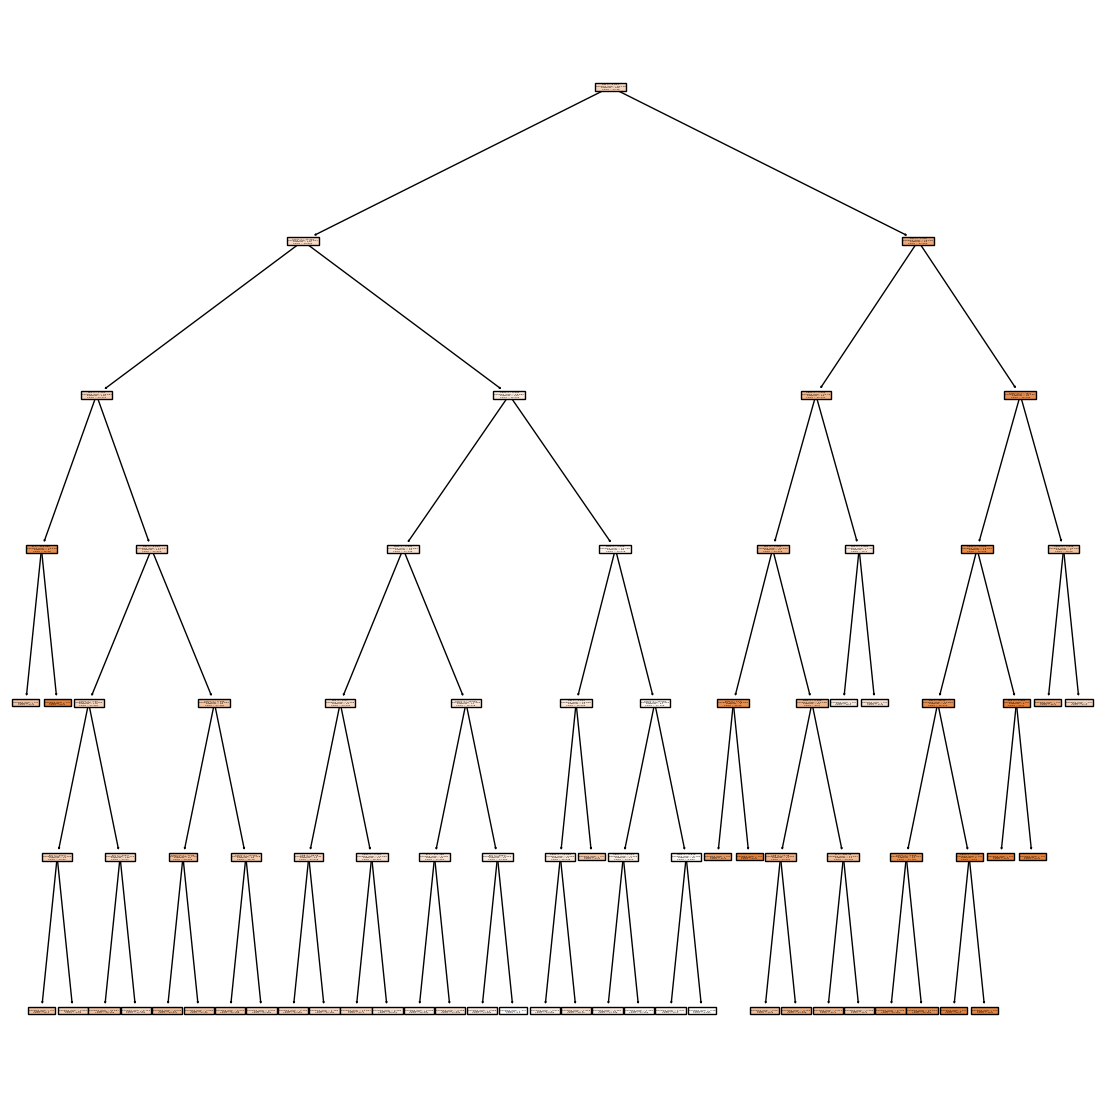

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(reg, 
     feature_names=boston["feature_names"],
     filled = True)

In [10]:
pre = reg.predict(x_test)

In [11]:
y_test

array([19.1, 10.4, 19.6, 13.8, 15. , 36.5, 14. , 25.2, 24.5, 20.8, 26.5,
       26.7, 34.9, 19.5, 11.3, 50. , 24.8, 20.2, 18.6, 38.7, 25. , 17.5,
       14.1, 22. ,  7. , 17.1,  5. ,  8.8, 22. , 37.9, 18.3, 44. , 35.4,
       32. , 16.8, 30.7, 22. , 30.1, 18.2, 31.2, 42.8, 22.8, 22.3, 26.4,
       23.3, 32.2, 50. , 23.1, 20. , 19.4, 24.8])

In [12]:
np.array([pre, y_test])

array([[20.79236641, 15.        , 20.79236641, 12.5       , 27.9       ,
        32.2       , 14.66190476, 28.7       , 20.79236641, 20.79236641,
        26.208     , 32.2       , 34.43809524, 20.79236641,  9.18709677,
        42.48333333, 23.8       , 20.79236641, 20.79236641, 46.32222222,
        20.79236641, 20.79236641, 14.73846154, 26.208     ,  8.1       ,
        17.94333333,  9.18709677,  9.18709677, 28.125     , 34.43809524,
        15.64210526, 50.        , 34.43809524, 26.208     , 20.79236641,
        32.2       , 20.79236641, 26.208     , 20.79236641, 30.87142857,
        35.2       , 27.65      , 23.8       , 20.79236641, 20.79236641,
        34.43809524, 46.32222222, 17.94333333, 20.18333333, 15.64210526,
        26.208     ],
       [19.1       , 10.4       , 19.6       , 13.8       , 15.        ,
        36.5       , 14.        , 25.2       , 24.5       , 20.8       ,
        26.5       , 26.7       , 34.9       , 19.5       , 11.3       ,
        50.        , 24.8    

In [13]:
print("預測: ", list(pre))
print("實際: ", list(y_test))

預測:  [20.79236641221374, 15.0, 20.79236641221374, 12.500000000000002, 27.9, 32.199999999999996, 14.661904761904763, 28.7, 20.79236641221374, 20.79236641221374, 26.208000000000002, 32.199999999999996, 34.438095238095244, 20.79236641221374, 9.187096774193547, 42.48333333333333, 23.8, 20.79236641221374, 20.79236641221374, 46.32222222222222, 20.79236641221374, 20.79236641221374, 14.738461538461536, 26.208000000000002, 8.1, 17.94333333333333, 9.187096774193547, 9.187096774193547, 28.125, 34.438095238095244, 15.6421052631579, 50.0, 34.438095238095244, 26.208000000000002, 20.79236641221374, 32.199999999999996, 20.79236641221374, 26.208000000000002, 20.79236641221374, 30.871428571428577, 35.2, 27.649999999999995, 23.8, 20.79236641221374, 20.79236641221374, 34.438095238095244, 46.32222222222222, 17.94333333333333, 20.183333333333334, 15.6421052631579, 26.208000000000002]
實際:  [19.1, 10.4, 19.6, 13.8, 15.0, 36.5, 14.0, 25.2, 24.5, 20.8, 26.5, 26.7, 34.9, 19.5, 11.3, 50.0, 24.8, 20.2, 18.6, 38.7,

In [14]:
# 測試模型表現
from sklearn.metrics import r2_score

r2_score(y_test, pre)

0.8435022668928831